In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transcripts = pd.read_csv('./TPM_mel+nev_oldref.csv')
transcripts

,sample_SRR,type_of_tissue,transcript_ID,chromosome,strand,start_pos,end_pos,number_of_exons,TPM,TPM_old,TPM/TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),chr12,+,6534512.0,6535141,2.0,1.575493,2.021110,0.7795186803
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),chr12,+,6534517.0,6538374,9.0,920.101929,1232.805054,0.7463482779
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),chr12,+,6534532.0,6538374,9.0,171.943039,0.000000,#DIV/0!
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),chr12,+,6534533.0,6537996,8.0,0.598639,0.000000,#DIV/0!
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),chr12,+,6534534.0,6538374,9.0,94.857643,2.514925,37.71788145
...,...,...,...,...,...,...,...,...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),chr12,-,6532290.0,6533498,2.0,0.000000,0.000000,#DIV/0!
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),chr19,+,35533455.0,35543026,6.0,0.000000,0.000000,#DIV/0!
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),chr19,+,35533456.0,35545599,11.0,0.000000,0.000000,#DIV/0!
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),chr19,+,35536783.0,35543026,6.0,4.727840,7.873865,0.6004471756


In [4]:
cols = ['strand', 'start_pos', 'end_pos', 'number_of_exons', 'chromosome', 'TPM', 'TPM/TPM_old']
tpm_t = transcripts.drop(cols, axis=1)
tpm_t

,sample_SRR,type_of_tissue,transcript_ID,TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),2.021110
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),1232.805054
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),0.000000
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),0.000000
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),2.514925
...,...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),0.000000
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),0.000000
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),0.000000
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),7.873865


In [5]:
gapdh_canon = ['GAPDH2 (ENST00000229239)']
gapdhs_canon = ['GAPDHS2 (ENST00000222286)', 'GAPDHS3 (ENST00000585510)']

In [6]:
tpm_g = tpm_t[tpm_t['transcript_ID']=='GAPDH2 (ENST00000229239)']
tpm_gs = tpm_t[tpm_t['transcript_ID'].isin(gapdhs_canon)]
len(tpm_g)

52

In [7]:
tpmsum = []
tt = []
for i in tpm_gs.sample_SRR.unique():
    tpmsum.append(tpm_gs[tpm_gs['sample_SRR'] == i]['TPM_old'].sum())
    tt.append(tpm_gs[tpm_gs['sample_SRR'] == i]['type_of_tissue'].unique()[0])
tpm_gs_sum = pd.DataFrame({
    'sample_SRR':tpm_gs.sample_SRR.unique(),
    'type_of_tissue':tt,
    'TPM_old':tpmsum
})
tpm_gs_sum['transcript_ID'] = 'GAPDHS'

In [8]:
dfsum = pd.concat([tpm_g.replace('GAPDH2 (ENST00000229239)', 'GAPDH'),tpm_gs_sum])
dfsum.reset_index(drop=True)

,sample_SRR,type_of_tissue,transcript_ID,TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH,1232.805054
1,SRR6916920_GSM3071667_MA.001.SH_M,M1,GAPDH,3412.084229
2,SRR6916904_GSM3071651_KO.679_M,M1,GAPDH,2043.166382
3,SRR6916903_GSM3071650_LE.037.RG_M,M1,GAPDH,1101.349365
4,SRR6916954_GSM3071701_BO.025.SE_M,M2,GAPDH,2478.438477
...,...,...,...,...
99,SRR6916933_GSM3071680_BO.013.NK.014_N,N2,GAPDHS,0.601008
100,SRR6916934_GSM3071681_LE.041.RL.042_N,N2,GAPDHS,0.588129
101,SRR6916926_GSM3071673_BO.005.SA.006_N,N2,GAPDHS,7.794409
102,SRR6916928_GSM3071675_LE.105.TF.106_N,N2,GAPDHS,9.222485


In [9]:
crtab_nev = pd.crosstab(index=dfsum[dfsum['type_of_tissue'].isin(['N1','N2'])].sample_SRR,columns=[dfsum[dfsum['type_of_tissue'].isin(['N1','N2'])].transcript_ID], values = dfsum[dfsum['type_of_tissue'].isin(['N1','N2'])].TPM_old, aggfunc = 'sum')
crtab_nev['norm']=crtab_nev['GAPDHS']/crtab_nev['GAPDH']
crtab_nev= crtab_nev.sort_values(by=['norm'], ascending=False)
crtab_nev

transcript_ID,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR6916890_GSM3071637_BO.001.SH.002_N,2597.698486,90.254288,0.034744
SRR6916888_GSM3071635_FKH.021.022_N,2037.730591,26.804420,0.013154
SRR6916893_GSM3071640_LE.037.RG.038_N,1510.296265,18.507109,0.012254
SRR6916889_GSM3071636_LE.081.TR.082_N,1016.115540,12.225971,0.012032
SRR6916886_GSM3071633_LE.063.SP.064_N,2240.908447,14.954709,0.006674
SRR6916928_GSM3071675_LE.105.TF.106_N,1683.812988,9.222485,0.005477
SRR6916895_GSM3071642_LE.029.SE.030_N,2401.234863,12.323106,0.005132
SRR6916887_GSM3071634_LE.117.RB.118_N,3266.782227,15.837584,0.004848
SRR6916926_GSM3071673_BO.005.SA.006_N,1715.377197,7.794409,0.004544


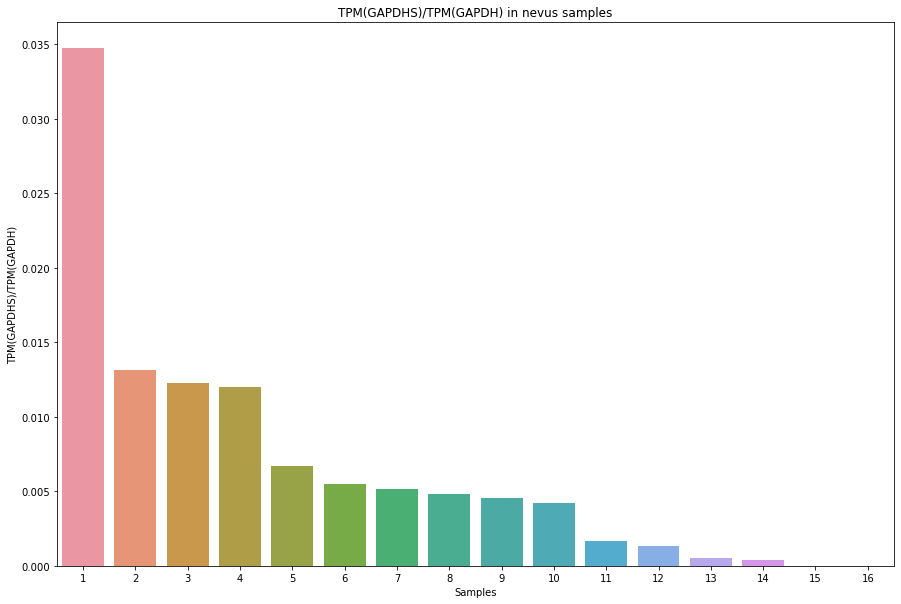

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(data=crtab_nev, y=crtab_nev['norm'], x = list(range(1,17)))
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS)/TPM(GAPDH) in nevus samples")
#plt.yscale('log')
plt.ylabel("TPM(GAPDHS)/TPM(GAPDH)")
plt.xlabel("Samples")
#plt.xticks(rotation=45, ha='right')
plt.show()

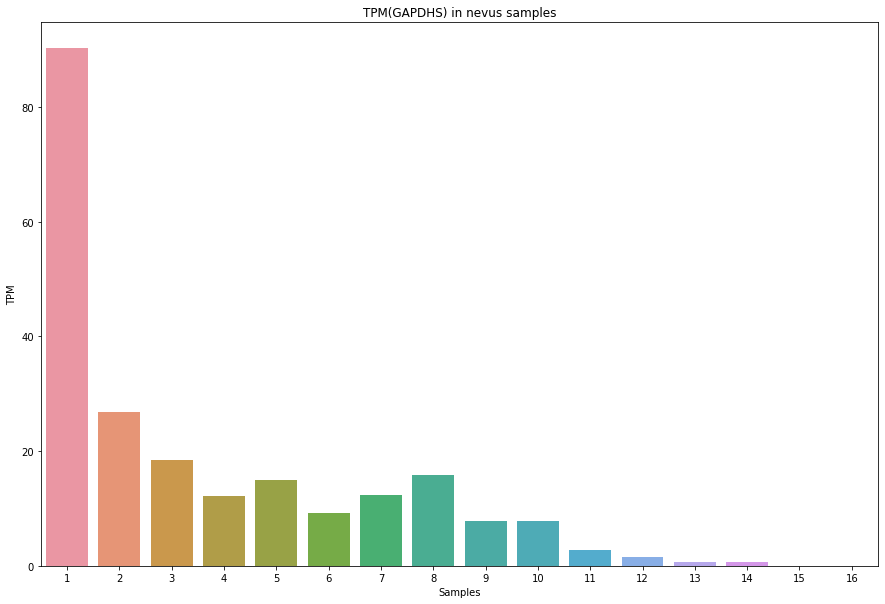

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(data=crtab_nev, y=crtab_nev['GAPDHS'], x = list(range(1,17)))
#sns.stripplot(data=tpmsum, size=6, color='black')
plt.title("TPM(GAPDHS) in nevus samples")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Samples")
#plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
crtab_mel = pd.crosstab(index=dfsum[dfsum['type_of_tissue'].isin(['M1','M2'])].sample_SRR,columns=[dfsum[dfsum['type_of_tissue'].isin(['M1','M2'])].transcript_ID], values = dfsum[dfsum['type_of_tissue'].isin(['M1','M2'])].TPM_old, aggfunc = 'sum')
crtab_mel['norm']=crtab_mel['GAPDHS']/crtab_mel['GAPDH']
len(crtab_mel)

36

In [23]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=crtab_mel['norm'].min(), vcenter=crtab_mel['norm'].mean(), vmax=crtab_mel['norm'].max())
pal = sns.diverging_palette(187, 358, center = 'light',n=len(crtab_mel), as_cmap=True)


In [24]:
crtab_mel = crtab_mel.sort_values(by=['norm'], ascending=False)
colors = [pal(norm(c)) for c in crtab_mel['norm']]
crtab_mel

#crtab_mel = crtab_mel.reindex(tpm_sum.index)
#crtab_mel

transcript_ID,GAPDH,GAPDHS,norm
sample_SRR,,,
SRR6916903_GSM3071650_LE.037.RG_M,1101.349365,24.404367,0.022159
SRR6916937_GSM3071684_FKH.021_M,1508.015381,33.109121,0.021955
SRR6916962_GSM3071709_LE.085.BU_M,3339.277588,63.982773,0.019161
SRR6916947_GSM3071694_BO.019.WG_M,1700.799438,26.566011,0.015620
SRR6916961_GSM3071708_FKH.007_M,1316.579834,16.046471,0.012188
SRR6916954_GSM3071701_BO.025.SE_M,2478.438477,27.692009,0.011173
SRR6916964_GSM3071711_BO.027.SM_M,3147.371094,27.297377,0.008673
SRR6916907_GSM3071654_LE.039.BE_M,1232.805054,8.337247,0.006763
SRR6916965_GSM3071712_LE.073.HK_M,2108.033936,13.464558,0.006387


In [53]:
np.median(crtab_mel['GAPDHS'].values)

4.7028045

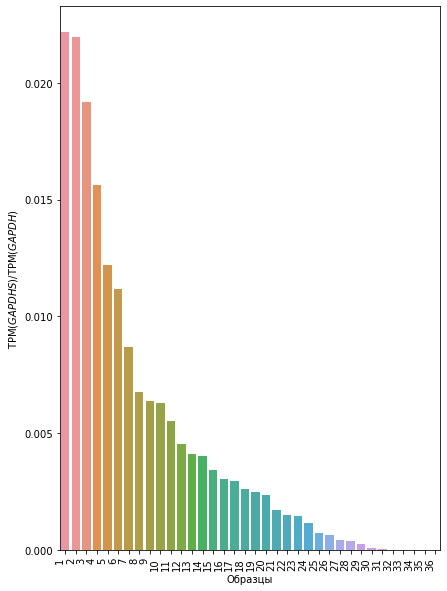

In [39]:
#font = {'weight': 'normal', 'size': 16}
#plt.figure(figsize=(15,10))
ax = plt.figure(figsize=(15,10)).add_subplot(121)
sns.barplot(data=crtab_mel, y=crtab_mel['norm'], x = list(range(1,37))) #palette=colors
#sns.stripplot(data=tpmsum, size=6, color='black')
#plt.title("Оценка TPM(GAPDHS)/TPM(GAPDH) в образцах меланом", color='#f5f5f5', fontdict=font)
#plt.yscale('log')
plt.ylabel("TPM($\it{GAPDHS}$)/TPM($\it{GAPDH}$)") #color='#f5f5f5', fontdict=font, size=20
plt.xlabel("Образцы") #color='#f5f5f5',
plt.tick_params(axis='x')    #setting up X-axis tick color to red
plt.tick_params(axis='y') #labelsize=20
#ax.spines['left'] #.set_color('#f5f5f5')        # setting up Y-axis tick color to red
#ax.spines['top'] #.set_color('#f5f5f5')
#ax.spines['bottom'] #.set_color('#f5f5f5') 
#ax.spines['right'] #.set_color('#f5f5f5')
#ax.set_facecolor("#f5f5f5")
plt.xticks(rotation=90, ha='right')
#plt.tick_params(
    #axis='x',          # changes apply to the x-axis 
    #which='both',      # both major and minor ticks are affected
    #bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    #labelbottom=False) # labels along the bottom edge are off
#plt.savefig('post2.png', transparent=True, dpi=199)
plt.show()

### Barplot TPM(GAPDHS) для каждого образца

In [30]:
tpm_t

,sample_SRR,type_of_tissue,transcript_ID,TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),2.021110
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),1232.805054
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),0.000000
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),0.000000
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),2.514925
...,...,...,...,...
931,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDH-DT (ENST00000537921),0.000000
932,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS1 (ENST00000586334),0.000000
933,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS2 (ENST00000222286),0.000000
934,SRR6916925_GSM3071672_BO.017.BU.018_N,N2,GAPDHS3 (ENST00000585510),7.873865


In [31]:
gapdhs_ts = ['GAPDHS1 (ENST00000586334)', 'GAPDHS2 (ENST00000222286)',
       'GAPDHS3 (ENST00000585510)', 'TR3 (MSTRG.20575.3)']

In [32]:
gapdh = tpm_t[-tpm_t['transcript_ID'].isin(gapdhs_ts)]
gapdh_m = gapdh[gapdh['type_of_tissue'].isin(['M1','M2'])]
gapdh_m

,sample_SRR,type_of_tissue,transcript_ID,TPM_old
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH1 (ENST00000496049),2.021110
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH2 (ENST00000229239),1232.805054
2,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH3 (ENST00000396856),0.000000
3,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH4 (ENST00000492719),0.000000
4,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH5 (ENST00000396861),2.514925
...,...,...,...,...
639,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDH10 (ENST00000396858),0.000000
640,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDH11 (ENST00000619601),0.000000
641,SRR6916935_GSM3071682_LE.045.WU_M,M2,TR1 (MSTRG.8244.12),0.000000
642,SRR6916935_GSM3071682_LE.045.WU_M,M2,TR2 (ENST00000602946),0.000000


In [33]:
gapdhs = tpm_t[tpm_t['transcript_ID'].isin(gapdhs_ts)]
gapdhs_m = gapdhs[gapdhs['type_of_tissue'].isin(['M1','M2'])]
gapdhs_m

,sample_SRR,type_of_tissue,transcript_ID,TPM_old
14,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDHS1 (ENST00000586334),0.000000
15,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDHS2 (ENST00000222286),0.000000
16,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDHS3 (ENST00000585510),8.337247
17,SRR6916907_GSM3071654_LE.039.BE_M,M1,TR3 (MSTRG.20575.3),0.000000
32,SRR6916920_GSM3071667_MA.001.SH_M,M1,GAPDHS1 (ENST00000586334),0.000000
...,...,...,...,...
629,SRR6916936_GSM3071683_BO.023.HS_M,M2,TR3 (MSTRG.20575.3),0.000000
644,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDHS1 (ENST00000586334),0.000000
645,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDHS2 (ENST00000222286),0.000000
646,SRR6916935_GSM3071682_LE.045.WU_M,M2,GAPDHS3 (ENST00000585510),4.915389


In [34]:
tpm_sum = pd.DataFrame(gapdhs_m.groupby(by=['sample_SRR'])['TPM_old'].sum()).rename(columns={'TPM_old':'TPM'})
tpm_sum = tpm_sum.reindex(crtab_mel.index)
tpm_sum

,TPM
sample_SRR,
SRR6916903_GSM3071650_LE.037.RG_M,24.404367
SRR6916937_GSM3071684_FKH.021_M,33.109121
SRR6916962_GSM3071709_LE.085.BU_M,63.982773
SRR6916947_GSM3071694_BO.019.WG_M,26.566011
SRR6916961_GSM3071708_FKH.007_M,16.046471
SRR6916954_GSM3071701_BO.025.SE_M,27.692009
SRR6916964_GSM3071711_BO.027.SM_M,27.297377
SRR6916907_GSM3071654_LE.039.BE_M,8.337247
SRR6916965_GSM3071712_LE.073.HK_M,13.464558


In [35]:
tpm_sum_g = pd.DataFrame(gapdh_m.groupby(by=['sample_SRR'])['TPM_old'].sum()).rename(columns={'TPM_old':'TPM'})
tpm_sum_g = tpm_sum_g.reindex(crtab_mel.index)
tpm_sum_g

,TPM
sample_SRR,
SRR6916903_GSM3071650_LE.037.RG_M,1258.832190
SRR6916937_GSM3071684_FKH.021_M,1662.192198
SRR6916962_GSM3071709_LE.085.BU_M,3839.514764
SRR6916947_GSM3071694_BO.019.WG_M,2217.540549
SRR6916961_GSM3071708_FKH.007_M,1454.338835
SRR6916954_GSM3071701_BO.025.SE_M,2823.249405
SRR6916964_GSM3071711_BO.027.SM_M,3577.676568
SRR6916907_GSM3071654_LE.039.BE_M,1457.080576
SRR6916965_GSM3071712_LE.073.HK_M,2319.278525


In [36]:
from scipy.stats.stats import pearsonr
pearsonr(tpm_sum_g['TPM'], tpm_sum['TPM'])
print('Коэффициент корреляции Пирсона: {}'.format(pearsonr(tpm_sum['TPM'], tpm_sum_g['TPM'])[0]))
print('P-value: {}'.format(pearsonr(tpm_sum_g['TPM'], tpm_sum['TPM'])[1]))

Коэффициент корреляции Пирсона: 0.08864310885434143
P-value: 0.6071804091131603


In [37]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=tpm_sum['TPM'].min(), vcenter=tpm_sum['TPM'].mean(), vmax=tpm_sum['TPM'].max())
pal = sns.diverging_palette(187, 358, center = 'light',n=len(crtab_mel), as_cmap=True)
#colors = [pal(norm(c)) for c in tpm_sum['TPM']]

<Figure size 1080x720 with 0 Axes>

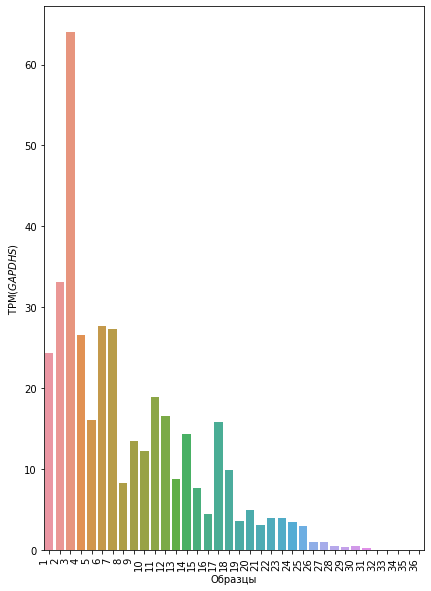

In [38]:
#font = {'weight': 'normal', 'size': 16}
plt.figure(figsize=(15,10))
ax = plt.figure(figsize=(15,10)).add_subplot(121)
sns.barplot(data=tpm_sum, y=tpm_sum['TPM'], x = list(range(1,37)))
#sns.stripplot(data=tpmsum, size=6, color='black')
#plt.title("Оценка количества транскриптов GAPDHS в образцах меланом", color='#f5f5f5', fontdict=font)
#plt.yscale('log')
plt.ylabel("TPM($\it{GAPDHS}$)")
plt.xlabel("Образцы")
#plt.tick_params(axis='x')    #setting up X-axis tick color to red
#plt.tick_params(axis='y', colors='#f5f5f5', labelsize=20)
#ax.spines['left'].set_color('#f5f5f5')        # setting up Y-axis tick color to red
#ax.spines['top'].set_color('#f5f5f5')
#ax.spines['bottom'].set_color('#f5f5f5') 
#ax.spines['right'].set_color('#f5f5f5')
plt.xticks(rotation=90, ha='right')
#plt.tick_params(
    #axis='x',          # changes apply to the x-axis 
    #which='both',      # both major and minor ticks are affected
    #bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    #labelbottom=False) # labels along the bottom edge are off
#ax.set_facecolor("#f5f5f5")
#plt.savefig('post3.png', transparent=True)
plt.show()

In [33]:
tpm_sum.sort_values(by=['TPM'], ascending=False).tail(10).index

Index(['SRR6916960_GSM3071707_KO.762.SW_M', 'SRR6916943_GSM3071690_FKH.011_M',
       'SRR6916921_GSM3071668_LE.049.SDI_M',
       'SRR6916949_GSM3071696_BO.017.BU_M',
       'SRR6916922_GSM3071669_LE.049.SDII_M',
       'SRR6916920_GSM3071667_MA.001.SH_M',
       'SRR6916959_GSM3071706_LE.051.WD_M', 'SRR6916939_GSM3071686_FKH.012_M',
       'SRR6916904_GSM3071651_KO.679_M',
       'SRR6916944_GSM3071691_BO.001.SH_2_M'],
      dtype='object', name='sample_SRR')

## Создание таблиц для анализа диф экспрессии

Мы берем top-10 и down-10 образцов меланом

#### TOP-10

In [33]:
top10 = crtab_mel.nlargest(10,'norm').index
top10

Index(['SRR6916903_GSM3071650_LE.037.RG_M', 'SRR6916937_GSM3071684_FKH.021_M',
       'SRR6916962_GSM3071709_LE.085.BU_M',
       'SRR6916947_GSM3071694_BO.019.WG_M', 'SRR6916961_GSM3071708_FKH.007_M',
       'SRR6916954_GSM3071701_BO.025.SE_M',
       'SRR6916964_GSM3071711_BO.027.SM_M',
       'SRR6916907_GSM3071654_LE.039.BE_M',
       'SRR6916965_GSM3071712_LE.073.HK_M', 'SRR6916946_GSM3071693_FKH.023_M'],
      dtype='object', name='sample_SRR')

#### DOWN-10

In [34]:
down10 = crtab_mel.nsmallest(10,'norm').index
down10

Index(['SRR6916904_GSM3071651_KO.679_M', 'SRR6916920_GSM3071667_MA.001.SH_M',
       'SRR6916939_GSM3071686_FKH.012_M', 'SRR6916959_GSM3071706_LE.051.WD_M',
       'SRR6916922_GSM3071669_LE.049.SDII_M',
       'SRR6916921_GSM3071668_LE.049.SDI_M',
       'SRR6916949_GSM3071696_BO.017.BU_M', 'SRR6916943_GSM3071690_FKH.011_M',
       'SRR6916960_GSM3071707_KO.762.SW_M', 'SRR6916918_GSM3071665_KO.971_M'],
      dtype='object', name='sample_SRR')

#### top10_abs

In [35]:
top10_abs = tpm_sum.nlargest(10,'TPM').index
top10_abs

Index(['SRR6916962_GSM3071709_LE.085.BU_M', 'SRR6916937_GSM3071684_FKH.021_M',
       'SRR6916954_GSM3071701_BO.025.SE_M',
       'SRR6916964_GSM3071711_BO.027.SM_M',
       'SRR6916947_GSM3071694_BO.019.WG_M',
       'SRR6916903_GSM3071650_LE.037.RG_M',
       'SRR6916957_GSM3071704_LE.057.HK_M', 'SRR6916958_GSM3071705_KO.1221_M',
       'SRR6916961_GSM3071708_FKH.007_M',
       'SRR6916924_GSM3071671_LE.049.SDIII_M'],
      dtype='object', name='sample_SRR')

In [38]:
top10_abs ==top10

array([False,  True, False, False, False, False, False, False, False,
       False])

# Melanoma vs nevus

In [9]:
dfsum

,sample_SRR,type_of_tissue,transcript_ID,TPM_old
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH,1232.805054
20,SRR6916920_GSM3071667_MA.001.SH_M,M1,GAPDH,3412.084229
37,SRR6916904_GSM3071651_KO.679_M,M1,GAPDH,2043.166382
56,SRR6916903_GSM3071650_LE.037.RG_M,M1,GAPDH,1101.349365
74,SRR6916954_GSM3071701_BO.025.SE_M,M2,GAPDH,2478.438477
...,...,...,...,...
47,SRR6916933_GSM3071680_BO.013.NK.014_N,N2,GAPDHS,0.601008
48,SRR6916934_GSM3071681_LE.041.RL.042_N,N2,GAPDHS,0.588129
49,SRR6916926_GSM3071673_BO.005.SA.006_N,N2,GAPDHS,7.794409
50,SRR6916928_GSM3071675_LE.105.TF.106_N,N2,GAPDHS,9.222485


In [10]:
dfsum_gapdh = dfsum[dfsum['transcript_ID']=='GAPDH']

In [22]:
def mn(x):
    if x == 'M1' or x =='M2':
        return 'Меланома'
    return 'Невус'

In [23]:
dfsum_gapdh['type'] = dfsum_gapdh['type_of_tissue'].apply(lambda x: mn(x))

<ipython-input-23-3b9c90c5dff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsum_gapdh['type'] = dfsum_gapdh['type_of_tissue'].apply(lambda x: mn(x))


In [24]:
dfsum_gapdh

,sample_SRR,type_of_tissue,transcript_ID,TPM_old,type
1,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDH,1232.805054,Меланома
20,SRR6916920_GSM3071667_MA.001.SH_M,M1,GAPDH,3412.084229,Меланома
37,SRR6916904_GSM3071651_KO.679_M,M1,GAPDH,2043.166382,Меланома
56,SRR6916903_GSM3071650_LE.037.RG_M,M1,GAPDH,1101.349365,Меланома
74,SRR6916954_GSM3071701_BO.025.SE_M,M2,GAPDH,2478.438477,Меланома
92,SRR6916902_GSM3071649_LE.117.RB_M,M1,GAPDH,3552.830078,Меланома
109,SRR6916918_GSM3071665_KO.971_M,M1,GAPDH,1653.737061,Меланома
128,SRR6916900_GSM3071647_LE.129.NG_M,M1,GAPDH,2138.540771,Меланома
146,SRR6916914_GSM3071661_KO.1031_M,M1,GAPDH,3778.000977,Меланома
164,SRR6916921_GSM3071668_LE.049.SDI_M,M1,GAPDH,4912.700684,Меланома


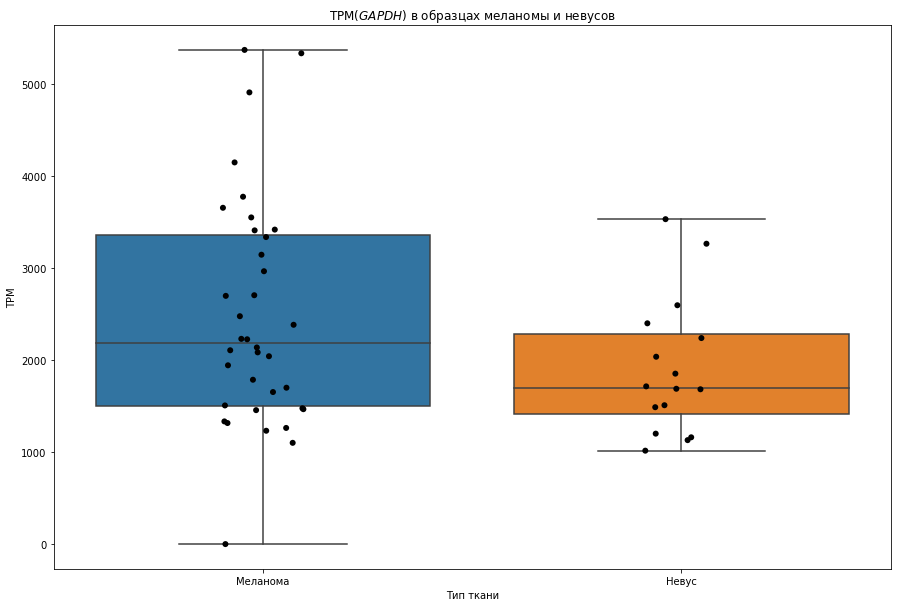

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dfsum_gapdh,x=dfsum_gapdh['type'],y=dfsum_gapdh['TPM_old'])
sns.stripplot(data=dfsum_gapdh,x=dfsum_gapdh['type'],y=dfsum_gapdh['TPM_old'], size=6, color='black')
plt.title("TPM($\it{GAPDH}$) в образцах меланомы и невусов")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Тип ткани")
plt.show()

In [26]:
dfsum_gapdhs = dfsum[dfsum['transcript_ID']=='GAPDHS']

In [27]:
dfsum_gapdhs['type'] = dfsum_gapdhs['type_of_tissue'].apply(lambda x: mn(x))

<ipython-input-27-210734a8ee50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsum_gapdhs['type'] = dfsum_gapdhs['type_of_tissue'].apply(lambda x: mn(x))


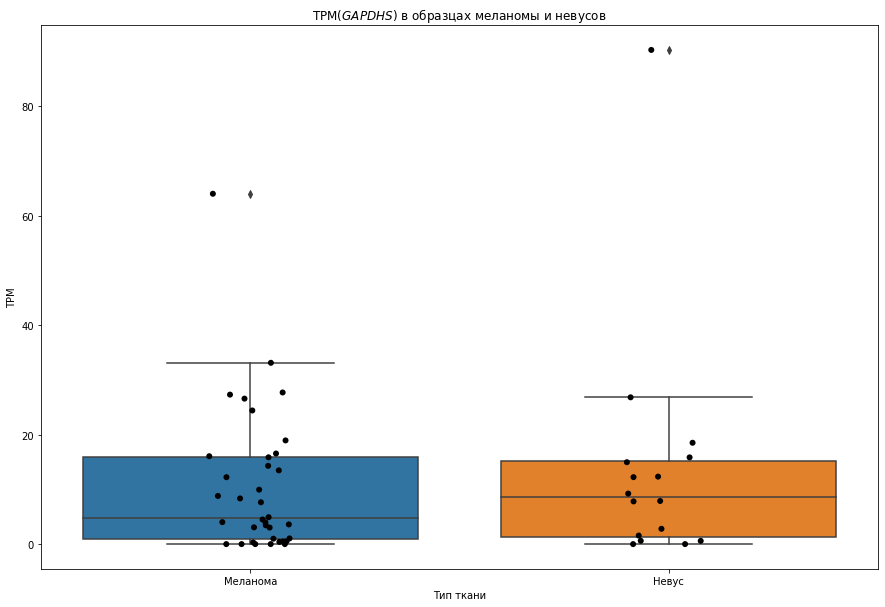

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dfsum_gapdhs,x=dfsum_gapdhs['type'],y=dfsum_gapdhs['TPM_old'])
sns.stripplot(data=dfsum_gapdhs,x=dfsum_gapdhs['type'],y=dfsum_gapdhs['TPM_old'], size=6, color='black')
plt.title("TPM($\it{GAPDHS}$) в образцах меланомы и невусов")
#plt.yscale('log')
plt.ylabel("TPM")
plt.xlabel("Тип ткани")
plt.show()

In [58]:
df = dfsum_gapdhs.merge(dfsum_gapdh, on='sample_SRR')
df['norm']=df['TPM_old_x']/df['TPM_old_y']
df

,sample_SRR,type_of_tissue_x,transcript_ID_x,TPM_old_x,type_x,type_of_tissue_y,transcript_ID_y,TPM_old_y,type_y,norm
0,SRR6916907_GSM3071654_LE.039.BE_M,M1,GAPDHS,8.337247,Меланома,M1,GAPDH,1232.805054,Меланома,0.006763
1,SRR6916920_GSM3071667_MA.001.SH_M,M1,GAPDHS,0.000000,Меланома,M1,GAPDH,3412.084229,Меланома,0.000000
2,SRR6916904_GSM3071651_KO.679_M,M1,GAPDHS,0.000000,Меланома,M1,GAPDH,2043.166382,Меланома,0.000000
3,SRR6916903_GSM3071650_LE.037.RG_M,M1,GAPDHS,24.404367,Меланома,M1,GAPDH,1101.349365,Меланома,0.022159
4,SRR6916954_GSM3071701_BO.025.SE_M,M2,GAPDHS,27.692009,Меланома,M2,GAPDH,2478.438477,Меланома,0.011173
5,SRR6916902_GSM3071649_LE.117.RB_M,M1,GAPDHS,14.293499,Меланома,M1,GAPDH,3552.830078,Меланома,0.004023
6,SRR6916918_GSM3071665_KO.971_M,M1,GAPDHS,1.035792,Меланома,M1,GAPDH,1653.737061,Меланома,0.000626
7,SRR6916900_GSM3071647_LE.129.NG_M,M1,GAPDHS,8.791514,Меланома,M1,GAPDH,2138.540771,Меланома,0.004111
8,SRR6916914_GSM3071661_KO.1031_M,M1,GAPDHS,9.938772,Меланома,M1,GAPDH,3778.000977,Меланома,0.002631
9,SRR6916921_GSM3071668_LE.049.SDI_M,M1,GAPDHS,0.467825,Меланома,M1,GAPDH,4912.700684,Меланома,0.000095


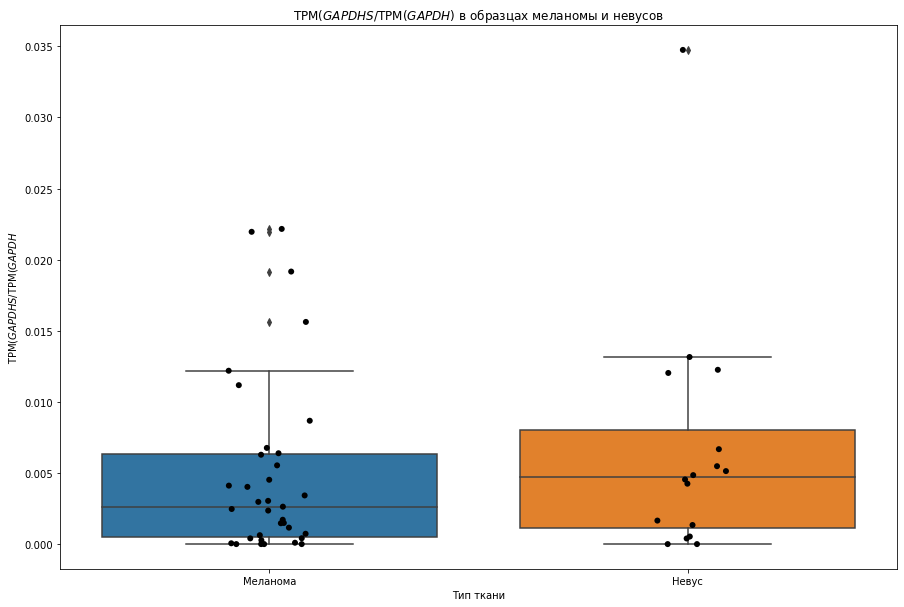

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x=df['type_x'],y=df['norm'])
sns.stripplot(data=df,x=df['type_x'],y=df['norm'], size=6, color='black')
plt.title("TPM($\it{GAPDHS}$/TPM($\it{GAPDH}$) в образцах меланомы и невусов")
#plt.yscale('log')
plt.ylabel("TPM($\it{GAPDHS}$/TPM($\it{GAPDH}$")
plt.xlabel("Тип ткани")
plt.show()

In [60]:
import scipy
scipy.stats.mannwhitneyu(list(df[df.type_x == 'Меланома']['TPM_old_x']), list(df[df.type_x == 'Невус']['TPM_old_x']))

MannwhitneyuResult(statistic=272.0, pvalue=0.3791646474493952)

In [63]:
import scipy
scipy.stats.mannwhitneyu(list(df[df.type_x == 'Меланома']['TPM_old_y']), list(df[df.type_x == 'Невус']['TPM_old_y']))

MannwhitneyuResult(statistic=205.0, pvalue=0.05095445133859794)

In [64]:
import scipy
scipy.stats.mannwhitneyu(list(df[df.type_x == 'Невус']['norm']), list(df[df.type_x == 'Невус']['norm']))

MannwhitneyuResult(statistic=128.0, pvalue=0.4924660068007804)